#### Student name: Ian Macharia
#### Student pace: full time
#### Scheduled project review date/time: Wednesday,24th May, 2023
#### Instructor name: Nikita Njoroge
#### Blog post URL:

## Business Understanding

### Overview of the Project and its Goals:

The goal of this project is to develop a credit card default prediction model using a given dataset. The dataset contains information about credit card clients, including their demographics, credit history, bill statements, and payment records. By analyzing this data, we aim to build a predictive model that can accurately predict whether a credit card client will default on their payment or not.

### Problem Statement and Importance of Credit Card Default Prediction:

The problem statement revolves around predicting credit card default, which refers to the failure of a borrower to make timely payments on their credit card. Credit card default prediction is crucial for financial institutions, such as banks and credit card companies, as it helps them assess the creditworthiness and risk profile of their clients. By accurately predicting credit card default, financial institutions can take proactive measures to mitigate potential risks and make informed decisions regarding credit approvals, setting credit limits, and debt collection strategies.

## Data Understanding

### Importing relevant packages
The packages we use are the built upon base Python language. They include: Numpy Package for mathematical analysis if we will need Pandas package - which will be used for cleaning and subsetting the data into dataframe Matplotlib package for some basic visualization Seaborn package for more detailed visualizations and clearer visualizations. It is common practice to import the packages using their aliases rather than having to call their full names.
For modelling and prediction we will employ the use of Scikit-Learn that contains several packages for performing regression analysis as well as classification.  

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.pipeline import Pipeline
from myfunctions import read_data, clean_data

# Reading dataset
The data is provided by:
Yeh,I-Cheng. (2016). default of credit card clients. UCI Machine Learning Repository. https://doi.org/10.24432/C55S3H.

The data attributes are as follows:

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:

> X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.

> X2: Gender (1 = male; 2 = female).

> X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).

> X4: Marital status (1 = married; 2 = single; 3 = others).

> X5: Age (year).

> X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: 
    >> `X6` = the repayment status in September, 2005; `X7` = the repayment status in August, 2005; . . .;`X11` = the repayment status in April, 2005. 
    
   >> The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.

> X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.

> X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

In [2]:
data = read_data()
data

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [3]:
# Summary of the dataset
# Getting the shape of the dataset
print("The shape of the data is:", data.shape)
print()
# Checking the data types and a deeper look into the column names
print("Information about the dataset:")
print(data.info())


The shape of the data is: (30001, 24)

Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 30001 entries, ID to 30000
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   X1      30001 non-null  object
 1   X2      30001 non-null  object
 2   X3      30001 non-null  object
 3   X4      30001 non-null  object
 4   X5      30001 non-null  object
 5   X6      30001 non-null  object
 6   X7      30001 non-null  object
 7   X8      30001 non-null  object
 8   X9      30001 non-null  object
 9   X10     30001 non-null  object
 10  X11     30001 non-null  object
 11  X12     30001 non-null  object
 12  X13     30001 non-null  object
 13  X14     30001 non-null  object
 14  X15     30001 non-null  object
 15  X16     30001 non-null  object
 16  X17     30001 non-null  object
 17  X18     30001 non-null  object
 18  X19     30001 non-null  object
 19  X20     30001 non-null  object
 20  X21     30001 non-null  obje

We notice that the data columns are in the second row, we will need to change that from the current that has the 'X' values
Next we will need to check on the contents of the data; specifically, wether or not there are missing values, and if they are in the right data type.
We observe that the data does not contain null values, From the data description, we observe that they collected the data as values rather than the actual observation. we will also have to convert them to categorical for the columns: `Marriage`, `Sex`, `Education`. To do this we will just replace the values within the dataset to the actual recorded values used by the data collection tool. this will also affect the columns containing the payment status, i.e. columns `Pay_0 - pay_6`

In [4]:
clean_df = clean_data(data)

In [5]:
clean_df

ID,Limit_bal,Sex,Education,Marriage,Age,Pay_status_Apr,Pay_status_May,Pay_Status_Jun,Pay_Status_Jul,Pay_Status_Aug,...,Bill_amt_Jul,Bill_amt_Aug,Bill_amt_Sept,Paid_amt_Apr,Paid_amt_May,Paid_amt_Jun,Paid_amt_Jul,Paid_amt_Aug,Paid_amt_Sept,Default payment next month
1,20000,2,University,Married,24,Watch,Watch,Performing,Performing,Defaulter,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,University,Single,26,Performing,Watch,Performing,Performing,Performing,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,University,Single,34,Performing,Performing,Performing,Performing,Performing,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,University,Married,37,Performing,Performing,Performing,Performing,Performing,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,University,Married,57,Performing,Performing,Performing,Performing,Performing,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,High School,Married,39,Performing,Performing,Performing,Performing,Performing,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,High School,Single,43,Performing,Performing,Performing,Performing,Performing,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,University,Single,37,Substandard,Watch,Watch,Performing,Performing,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,80000,1,High School,Married,41,Watch,Performing,Performing,Performing,Performing,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [6]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Limit_bal                   30000 non-null  int64   
 1   Sex                         30000 non-null  category
 2   Education                   30000 non-null  object  
 3   Marriage                    30000 non-null  object  
 4   Age                         30000 non-null  int64   
 5   Pay_status_Apr              30000 non-null  object  
 6   Pay_status_May              30000 non-null  object  
 7   Pay_Status_Jun              30000 non-null  object  
 8   Pay_Status_Jul              30000 non-null  object  
 9   Pay_Status_Aug              30000 non-null  object  
 10  Pay_Status_Sept             30000 non-null  object  
 11  Bill_amt_Apr                30000 non-null  int64   
 12  Bill_amt_May                30000 non-null  int64   
 13  Bill_amt_Jun         

#### Checking for Outliers
After rigourous data clean up, we the try and fine tune the data for ploting, visualization and subsequent modelling.
we will begin by checking for possible outliers

cols_to_plot = clean_df[['Limit_bal', 'Age']]
######## Create a subplot grid
fig, axes = plt.subplots(nrows=1, ncols=len(cols_to_plot), figsize=(20, 16), sharey=True)
######### Create a boxplot for each variable in a separate subplot
for i, col in enumerate(cols_to_plot):
    axes[i].boxplot(clean_df[col])
    axes[i].set_title(col, fontsize=12)
    
plt.tight_layout()
plt.show()

# ######Select the variables you want to plot
cols_to_plot = clean_df[['Limit_bal', 'Age']]
#######bill_cols_to_plot = clean_df[['Bill_amt_Apr', 'Bill_amt_May', 'Bill_amt_Jun','Bill_amt_Jul', 'Bill_amt_Aug', 'Bill_amt_Sept']]
########paid_cols_to_plot = clean_df[['Paid_amt_Apr','Paid_amt_May', 'Paid_amt_Jun', 'Paid_amt_Jul', 'Paid_amt_Aug','Paid_amt_Sept']]
######## Create a subplot grid
fig, axes = plt.subplots(nrows=1, ncols=len(cols_to_plot), figsize=(20, 16), sharey=True)

####### Create a boxplot for each variable in a separate subplot
for i, col in enumerate(cols_to_plot):
    axes[i].boxplot(clean_df[col])
    axes[i].set_title(col, fontsize=12)

    
plt.tight_layout()
plt.show()


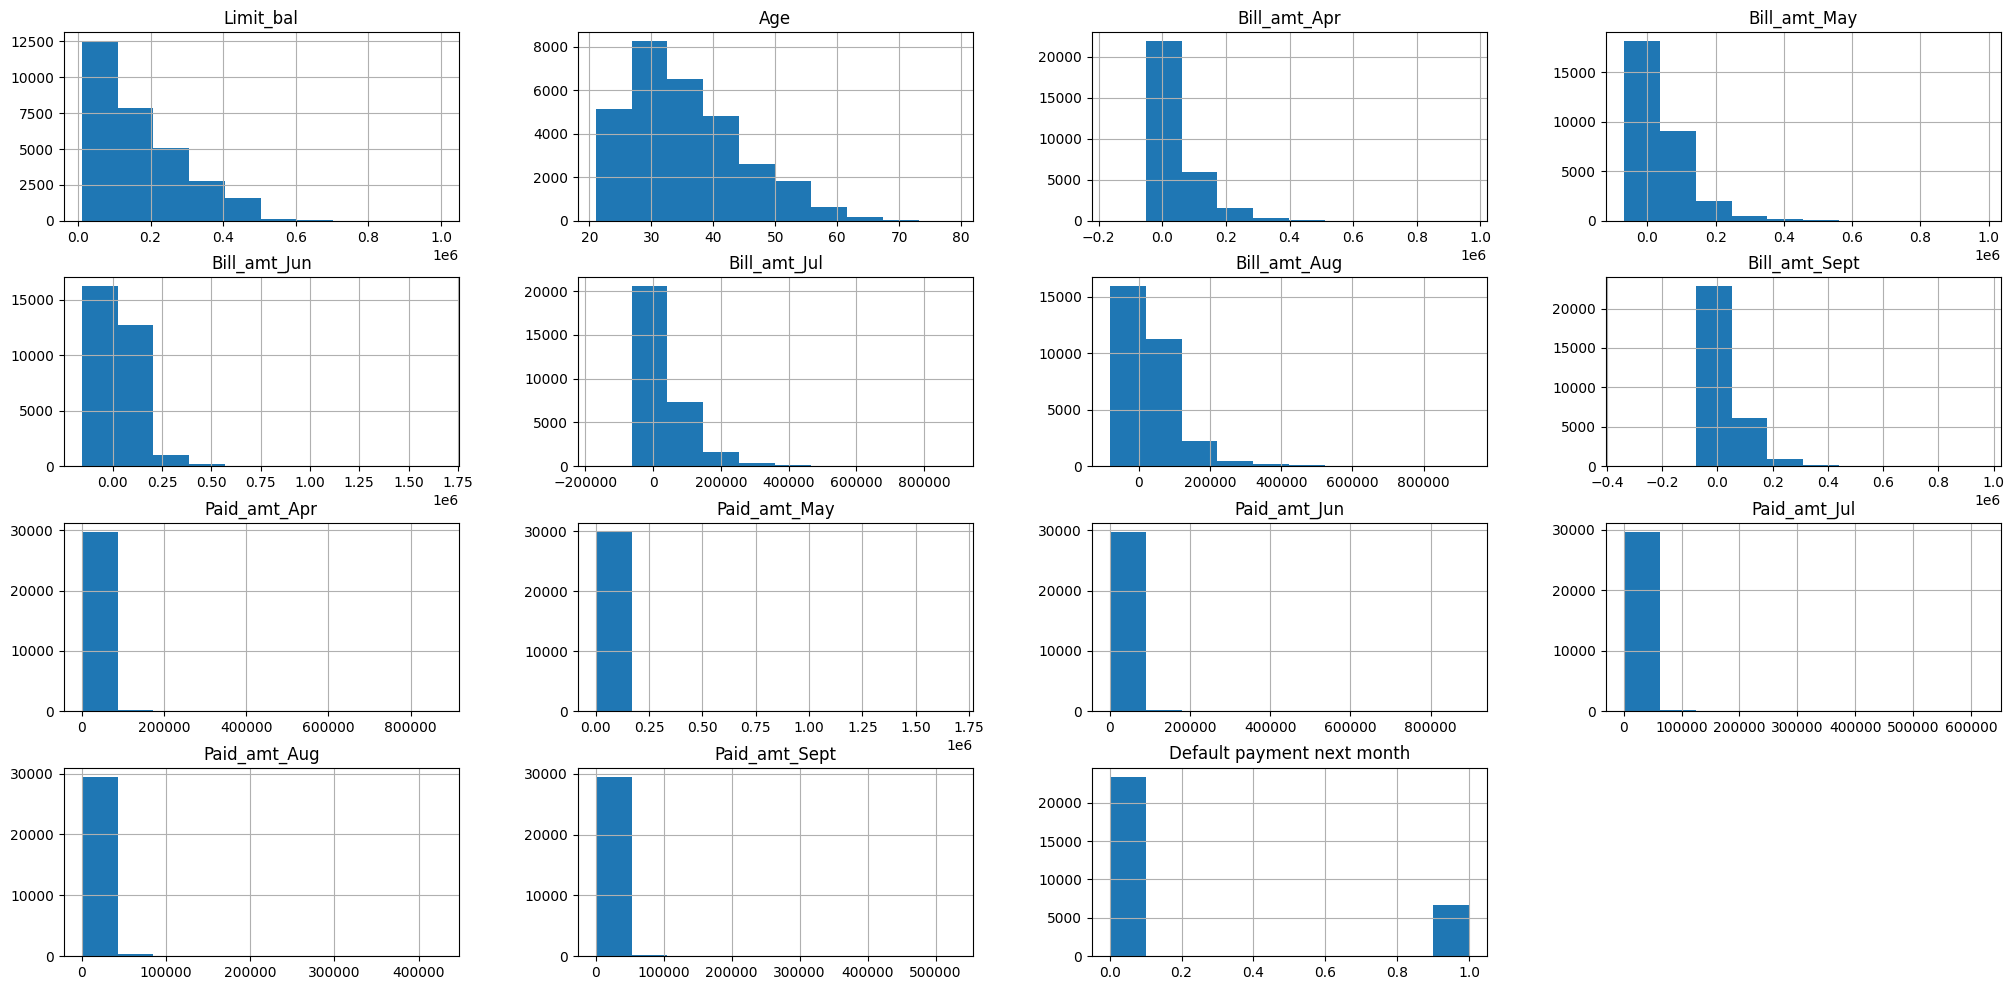

In [8]:
# Histogram plots for each data
# Select the numerical variables you want to plot
num_cols_to_plot = clean_df.select_dtypes(include=['int64']).columns.drop([])

# Create a histogram for each variable
clean_df[num_cols_to_plot].hist(figsize=(25, 12))
plt.savefig('images/Histograms')
plt.show()


We observe

In [9]:
# We want to Group price into three cartegories 
# Define the percentile values for each category
limit = clean_df['Limit_bal']
high_percentile = np.percentile(limit, 75)
low_percentile = np.percentile(limit, 25)

# Group the prices into categories based on the percentiles
high_prices = limit[limit > high_percentile]
medium_prices = limit[(limit >= low_percentile) & (limit <= high_percentile)]
low_prices = limit[limit < low_percentile]


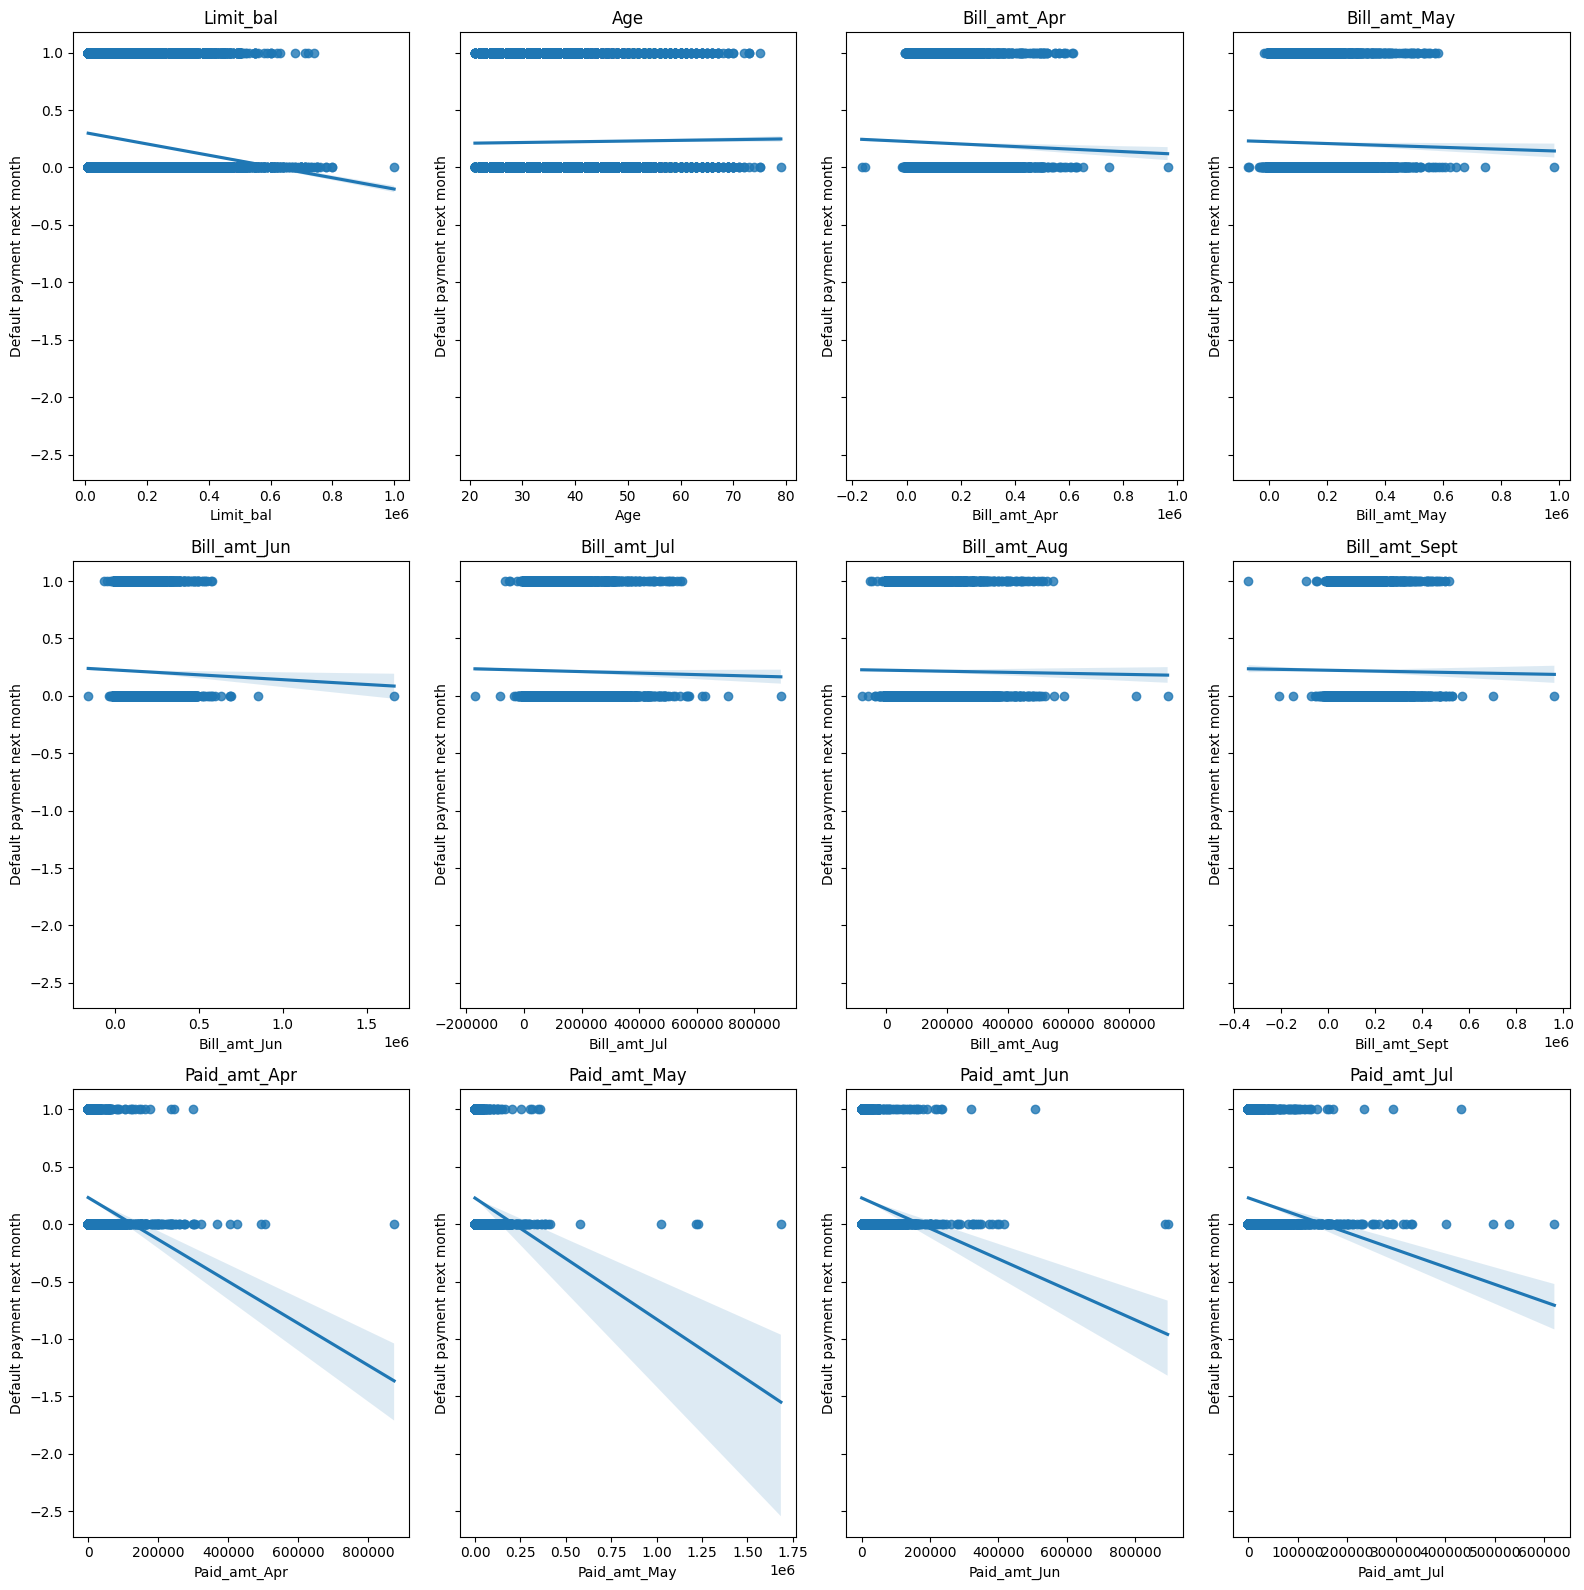

In [10]:
X = clean_df.drop(columns=['Sex', 'Education', 'Marriage', 'Pay_status_Apr',
                            'Pay_status_May', 'Pay_Status_Jun', 'Pay_Status_Jul',
                            'Pay_Status_Aug', 'Pay_Status_Sept'])
fig, axs = plt.subplots(3, 4, figsize=(16, 16), sharey=True)
for i in range(3):
    for j in range(4):
        if i*4 + j < len(X.columns):
            sns.regplot(x=X.iloc[:,i*4+j], y='Default payment next month', data=clean_df, ax=axs[i][j])
            axs[i][j].set_title(X.columns[i*4+j])
plt.tight_layout()
plt.show()

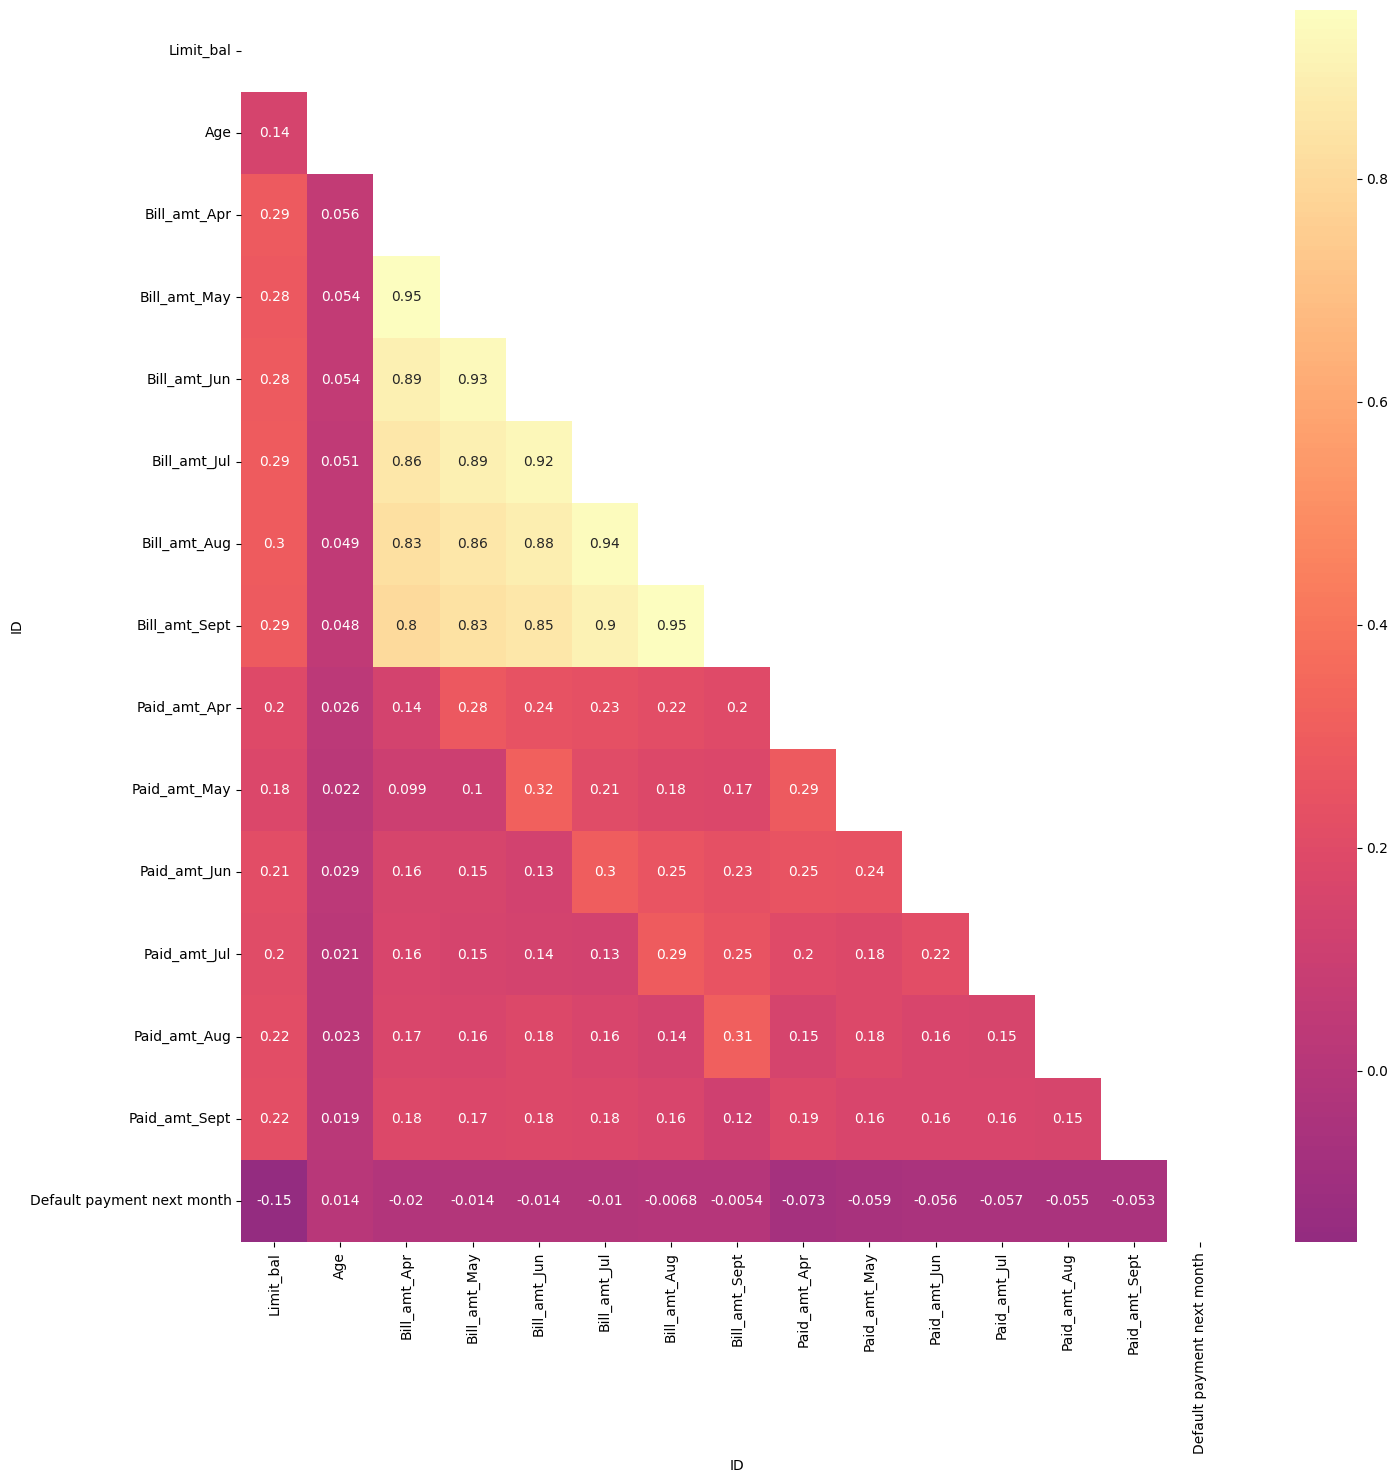

<Figure size 640x480 with 0 Axes>

In [11]:
## Multicollinearity
data_corr = clean_df.drop(columns=['Sex', 'Education', 'Marriage', 'Pay_status_Apr',
                            'Pay_status_May', 'Pay_Status_Jun', 'Pay_Status_Jul',
                            'Pay_Status_Aug', 'Pay_Status_Sept'])
# Create a correlation matrix
corr_matrix = data_corr.corr()
# Create a fig size
plt.figure(figsize=(16, 16))
# Create a mask to show only the lower triangle
mask = np.zeros_like(corr_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True
# Plot the heatmap with the lower triangle mask applied
sns.heatmap(corr_matrix, mask=mask, cmap='magma', center=0, annot=True)
# Show the plot
plt.show();
# Save figure
plt.savefig('Images/multicollinearity.png')
## We are drawing only the lower half of the triangle because the matrix is symmetrical, and also to help in reducing redundancy and make it easier to read the matrix. It also saves space, especially when dealing with a large number of variables, and can help to identify patterns or relationships among the variables more quickly



In [12]:
# Looking at correlations between other variables and price
data_corr.corr()["Default payment next month"]

ID
Limit_bal                    -0.153520
Age                           0.013890
Bill_amt_Apr                 -0.019644
Bill_amt_May                 -0.014193
Bill_amt_Jun                 -0.014076
Bill_amt_Jul                 -0.010156
Bill_amt_Aug                 -0.006760
Bill_amt_Sept                -0.005372
Paid_amt_Apr                 -0.072929
Paid_amt_May                 -0.058579
Paid_amt_Jun                 -0.056250
Paid_amt_Jul                 -0.056827
Paid_amt_Aug                 -0.055124
Paid_amt_Sept                -0.053183
Default payment next month    1.000000
Name: Default payment next month, dtype: float64

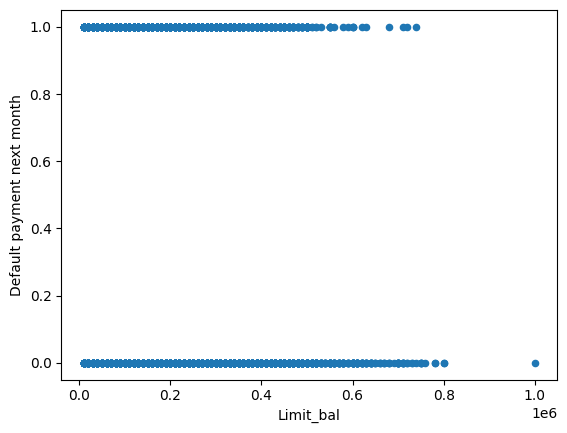

In [16]:
# Since Sqft_living is the feature with the strongest correlation in our dataset let's build our baseline model with that
clean_df.plot.scatter(x="Limit_bal", y="Default payment next month");

## Modelling

In [ ]:
# Function to plot bar charts showing Payment Status against Limit balance
# takes in data and the columns to be plotted
def plot_bar_charts(data, columns):
    for column in columns:
        x = column
        y = data['Limit_bal']
        title = f"Distribution of {column}"
        xlabel = column.replace('_', ' ').title()
        ylabel = "Count"
        
        plt.figure(figsize=(18,6))
        sns.histplot(x=column, data=data)
        plt.xticks(rotation=90)
        plt.xlabel(xlabel, fontsize=26)
        plt.ylabel(ylabel, fontsize=26)
        plt.title(title, fontsize=26)
        plt.show()

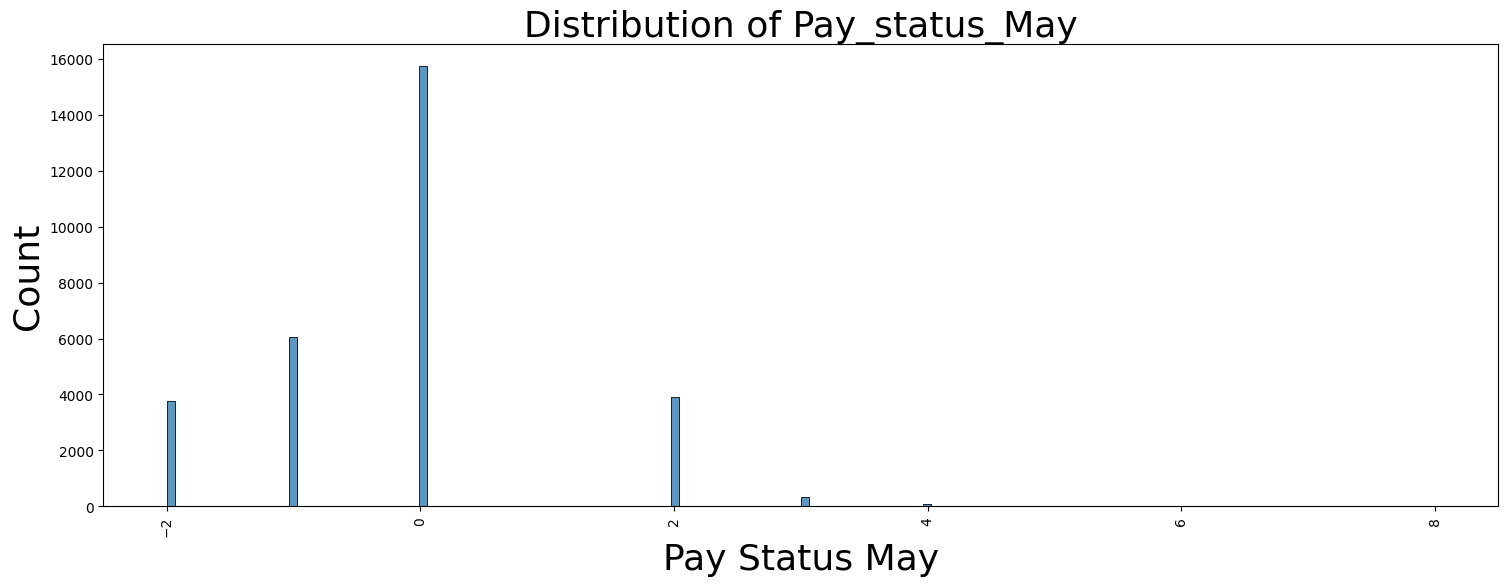

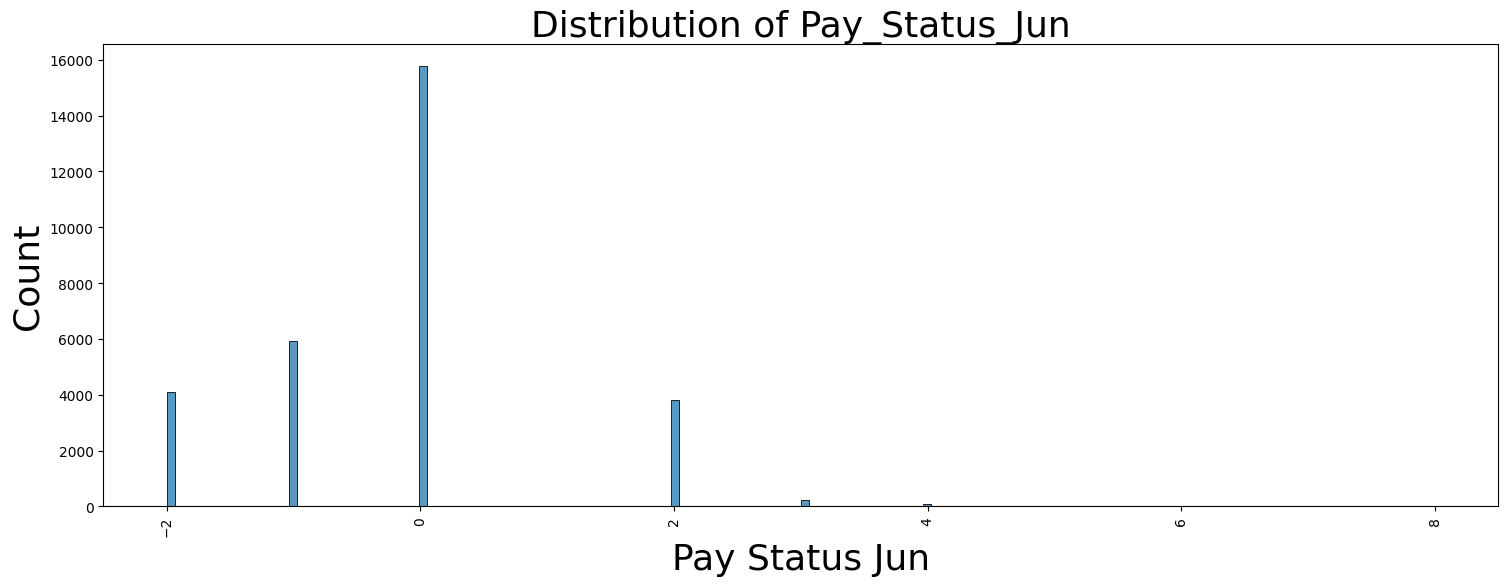

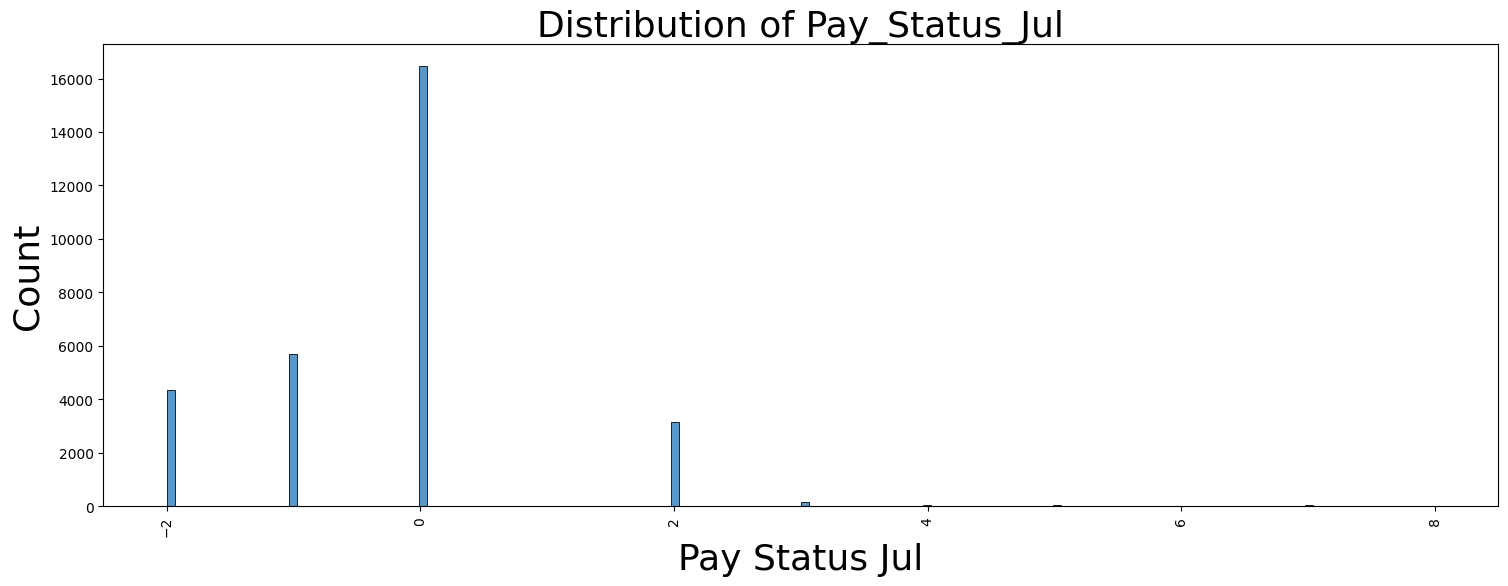

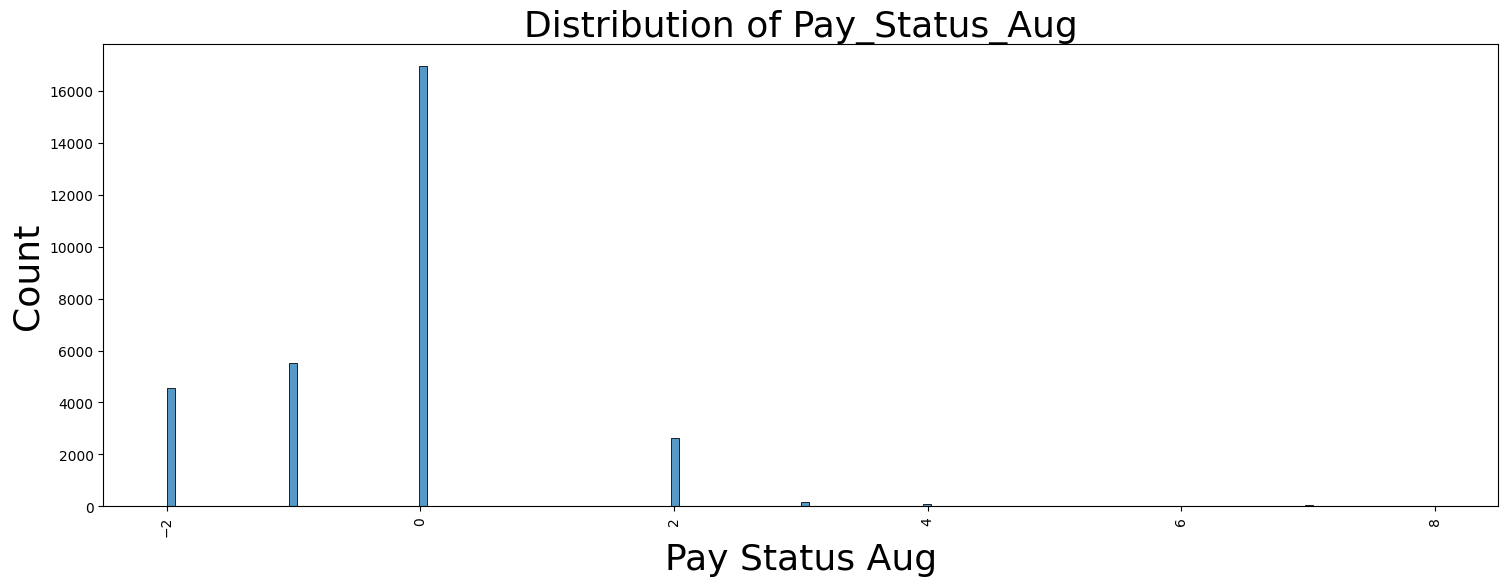

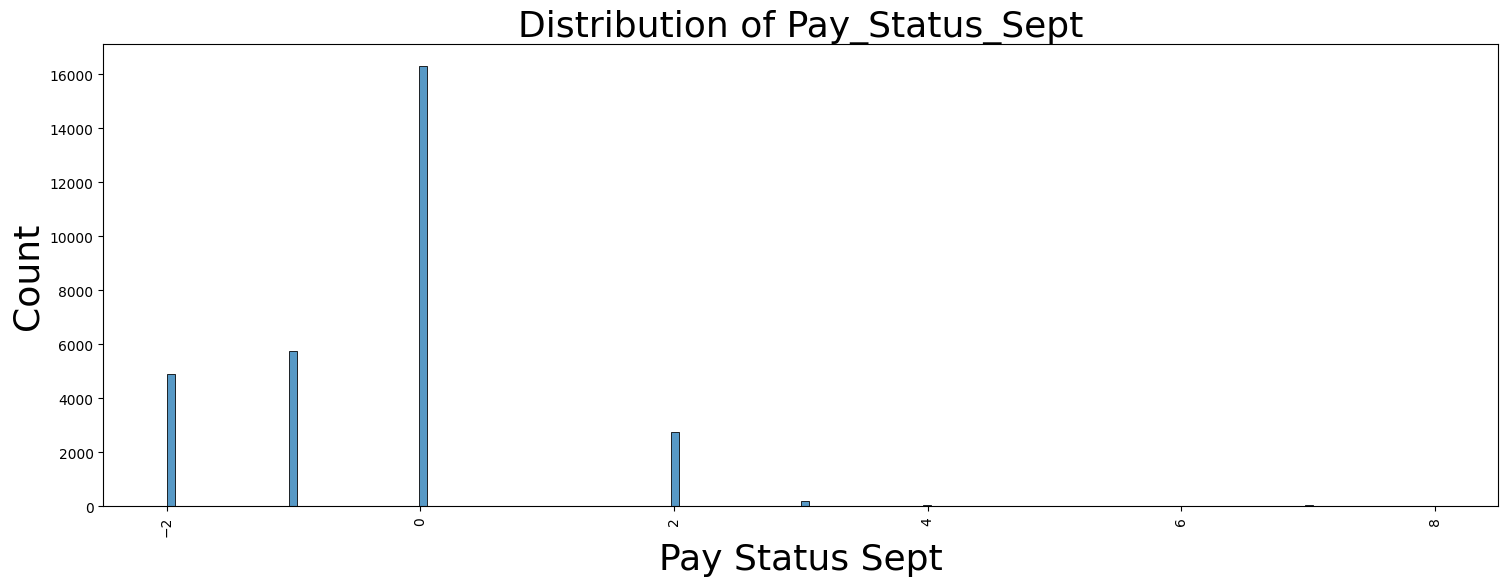

In [ ]:
columns_to_plot = ['Pay_status_May', 'Pay_Status_Jun', 'Pay_Status_Jul', 'Pay_Status_Aug',
                    'Pay_Status_Sept']
plot_bar_charts(data, columns_to_plot)

In [ ]:
data.columns

Index(['Limit_bal', 'Sex', 'Education', 'Marriage', 'Age', 'Pay_status_Apr',
       'Pay_status_May', 'Pay_Status_Jun', 'Pay_Status_Jul', 'Pay_Status_Aug',
       'Pay_Status_Sept', 'Bill_amt_Apr', 'Bill_amt_May', 'Bill_amt_Jun',
       'Bill_amt_Jul', 'Bill_amt_Aug', 'Bill_amt_Sept', 'Paid_amt_Apr',
       'Paid_amt_May', 'Paid_amt_Jun', 'Paid_amt_Jul', 'Paid_amt_Aug',
       'Paid_amt_Sept', 'Default payment next month'],
      dtype='object', name='ID')

In [ ]:
data.describe()

ID,Limit_bal,Age,Pay_status_Apr,Pay_status_May,Pay_Status_Jun,Pay_Status_Jul,Pay_Status_Aug,Pay_Status_Sept,Bill_amt_Apr,Bill_amt_May,...,Bill_amt_Jul,Bill_amt_Aug,Bill_amt_Sept,Paid_amt_Apr,Paid_amt_May,Paid_amt_Jun,Paid_amt_Jul,Paid_amt_Aug,Paid_amt_Sept,Default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


We will now look at the values in our target column. Here the entry 0 refers to non default in the coming month, and 1 refers to default.

In [ ]:
data['Default payment next month'].value_counts()

Default payment next month
0    23364
1     6636
Name: count, dtype: int64

we observe the data only has 6636 clients who default their payments. 